In [110]:
#pip install pywaffle

import pandas as rData
import  matplotlib.pyplot as myPlot
import numpy as np
from altair import Chart
from pywaffle import Waffle

url = "SA-COVID19v1.xlsx"
myData = rData.read_excel(url,sheet_name = "Sheet", 
                          skiprows = range(0) )

myData.drop(["Daily / Cumulative"], axis = 1, inplace = True)
                          
                                        

print(myData.isnull().sum())





Indicator        0
Date             0
Event        29729
region           6
City             6
Cases            8
dtype: int64


In [111]:
myData


,Indicator,Date,Event,region,City,Cases
0,Cases,2020-03-02,First case of COVID-19,Eastern Region,Qatif,1
1,Cases,2020-03-04,Umrah suspension,Eastern Region,Qatif,1
2,Cases,2020-03-07,NaN,Eastern Region,Qatif,2
3,Cases,2020-03-08,NaN,Total,Total,4
4,Cases,2020-03-10,NaN,Eastern Region,Dammam,4
...,...,...,...,...,...,...
30868,Active cases,2020-05-13,NaN,Northern Borders,Hazm Al Jalamid,18
30869,Active cases,2020-05-13,NaN,Al Jouf,Al Hadithah Border Station,5
30870,Active cases,2020-05-13,NaN,Jazan,Al Aydabi,1
30871,Active cases,2020-05-13,NaN,Tabuk,Umluj,26


# data type

In [112]:
myData.dtypes

Indicator            object
Date         datetime64[ns]
Event                object
region               object
City                 object
Cases                object
dtype: object

In [117]:
print(myData['Cases'])

0         1
1         1
2         2
3         4
4         4
         ..
30868    18
30869     5
30870     1
30871    26
30872    41
Name: Cases, Length: 30873, dtype: object


# describe

In [103]:
myData.describe(include="all")

<ipython-input-103-0b42d6a79c80>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  myData.describe(include="all")


,Indicator,Date,Event,region,City,Cases
count,30873,30873,1144,30867,30867,30865.0
unique,5,104,14,14,188,2156.0
top,Cases,2020-06-13 00:00:00,Partial lifting of curfew in all cities except...,Eastern Region,Total,1.0
freq,12534,772,273,5455,713,6334.0
first,NaN,2020-03-02 00:00:00,NaN,NaN,NaN,NaN
last,NaN,2020-06-13 00:00:00,NaN,NaN,NaN,NaN


In [104]:
myData.info()
myData["Total"] = myData.sum(axis = 1)
print(myData.iloc[0:2])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30873 entries, 0 to 30872
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Indicator  30873 non-null  object        
 1   Date       30873 non-null  datetime64[ns]
 2   Event      1144 non-null   object        
 3   region     30867 non-null  object        
 4   City       30867 non-null  object        
 5   Cases      30865 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 1.4+ MB
  Indicator       Date                   Event          region   City Cases  \
0     Cases 2020-03-02  First case of COVID-19  Eastern Region  Qatif     1   
1     Cases 2020-03-04        Umrah suspension  Eastern Region  Qatif     1   

   Total  
0    0.0  
1    0.0  


In [105]:

print(myData["Cases"].dtypes)
myData["Cases"].replace("?", np.nan, inplace = True)
myData["Cases"] = myData["Cases"].astype("float64")
print(myData["Cases"].dtypes)
myData["Cases"].mean()


print(myData["Cases"].dtypes)
myData["Cases"].replace("-", np.nan, inplace = True)
myData["Cases"] = myData["Cases"].astype("float64")
print(myData["Cases"].dtypes)
myData["Cases"].mean()



bins = np.linspace(min(myData["Cases"]), max(myData["Cases"]), 4)
g_names = ["low", "mid", "high"]
myData["Cases_binning"] = rData.cut(myData["Cases"], bins, labels=g_names, include_lowest = True)
print(myData["Cases_binning"])

############### Convert form Categroical Variables to Numerical Variables
print(myData["Event"])
print(rData.get_dummies(myData["Event"]))
#print(myData.info())



object
float64
float64
float64
0        low
1        low
2        low
3        low
4        low
        ... 
30868    low
30869    low
30870    low
30871    low
30872    low
Name: Cases_binning, Length: 30873, dtype: category
Categories (3, object): ['low' < 'mid' < 'high']
0        First case of COVID-19
1              Umrah suspension
2                           NaN
3                           NaN
4                           NaN
                  ...          
30868                       NaN
30869                       NaN
30870                       NaN
30871                       NaN
30872                       NaN
Name: Event, Length: 30873, dtype: object
       Curfew started for 21 days (6am -7 pm)  Domestic flights suspension  \
0                                           0                            0   
1                                           0                            0   
2                                           0                            0   
3                  

# Descriptive Stat

0          Eastern Region
1          Eastern Region
2          Eastern Region
3                   Total
4          Eastern Region
               ...       
30868    Northern Borders
30869             Al Jouf
30870               Jazan
30871               Tabuk
30872      Eastern Region
Name: region, Length: 30873, dtype: object
Eastern Region      5455
Mecca               5118
Riyadh              4650
Asir                3223
Jazan               2311
Qassim              2226
Medina              1605
Tabuk               1380
Al Bahah            1229
Northern Borders     898
Najran               725
Total                713
Hail                 703
Al Jouf              631
Name: region, dtype: int64


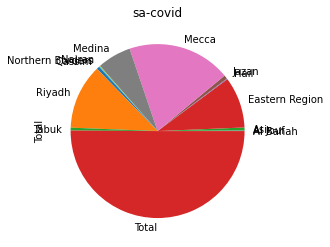

In [106]:

print(myData["region"])
DW_myData = myData["region"].value_counts()
DW_myData.rename(index={"region":"Values"}, inplace = True)
DW_myData.index.rename = "region"
print(DW_myData)

myData["Total"] = myData.sum(axis = 1)
myData.set_index('region', inplace= True)
myData= myData.groupby('region', axis= 0).sum()

myData['Total'].plot(kind = "pie")
myPlot.title("sa-covid")
myPlot.show()


<ipython-input-107-399849e056de>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myData_Top5['Total'] = myData_Top5['Total'] +1500 /10000


['Eastern Region', 'Eastern Region', 'Eastern Region', 'Riyadh', 'Eastern Region']
[0.15, 0.15, 0.15, 0.15, 0.15]
{'region': ['Eastern Region', 'Eastern Region', 'Eastern Region', 'Riyadh', 'Eastern Region'], 'Total': [0.15, 0.15, 0.15, 0.15, 0.15]}
           region  Total
0  Eastern Region   0.15
1  Eastern Region   0.15
2  Eastern Region   0.15
3          Riyadh   0.15
4  Eastern Region   0.15


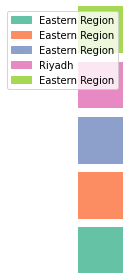

In [107]:
#! pip install pywaffle
import pandas as rData
import  matplotlib.pyplot as myPlot
import numpy as np
from pywaffle import Waffle

url = "SA-COVID19v1.xlsx"
myData = rData.read_excel(url,sheet_name = "Sheet", 
                          skiprows = range(0) )

myData.drop(["Daily / Cumulative"], axis = 1, inplace = True)



myData["Total"] = myData.sum(axis = 1)
myData.set_index('region', inplace = True)
myData.sort_values(['Total'], ascending = False, axis = 0, inplace = True)
myData_Top5 = myData.head(5)
myData_Top5['Total'] = myData_Top5['Total'] +1500 /10000
myData_Top5 = myData_Top5['Total'].transpose()
print(list(myData_Top5.index))
print(list(myData_Top5.iloc[:]))
data = {'region': list(myData_Top5.index), 'Total': list(myData_Top5.iloc[:])}
print(data)
data_DF = rData.DataFrame(data)
print(data_DF)
fig = myPlot.figure(
    FigureClass = Waffle,
    rows = 5,
    values = data_DF.Total,
    labels = list(data_DF.region)
)

In [119]:
#!pip install folium
import folium
import pandas as rData

state_data = "SA-COVID19v1.xlsx"

state_data_read = rData.read_excel(state_data, sheet_name = "Sheet", 
                        skiprows = range(0) )
world_map = folium.Map(location = [23.885942, 45.079163], zoom_start = 6)
myData= myData.groupby('region', axis= 0).sum()

folium.Map(
name='Map',
columns = ['region', 'Cases'],
key_on = 'feature.id',
fill_color = 'YlGnBu',
fill_opacity = 0.7,
line_opacity = 0.2,
legend_name = 'SA-COVID19'
)

world_map
folium.Marker([26.959770, 49.568741], popup = 'more cases').add_to(world_map)
world_map